In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("customers_data.csv")
df.drop("CustomerID",axis=1,inplace=True)
df

,Gender,AgeGroup,ProductQuality,DeliverySpeed,PriceSatisfaction,SupportRating,ComplaintFiled,Satisfaction
0,Male,Teen,Excellent,Slow,High,6,No,Medium
1,Female,Senior,Poor,Slow,High,6,Yes,Low
2,Male,Adult,Poor,Fast,High,8,No,Medium
3,Male,Senior,Average,Slow,High,5,No,Low
4,Male,Adult,Average,Slow,Medium,3,No,Low
...,...,...,...,...,...,...,...,...
795,Male,Senior,Average,Normal,Medium,3,No,Low
796,Male,Senior,Excellent,Slow,Low,6,No,Medium
797,Male,Senior,Poor,Normal,Medium,10,No,Low
798,Male,Adult,Poor,Fast,Medium,5,No,Low


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,Gender,AgeGroup,ProductQuality,DeliverySpeed,PriceSatisfaction,SupportRating,ComplaintFiled,Satisfaction
0,1,2,1,2,0,6,0,2
1,0,1,2,2,0,6,1,1
2,1,0,2,0,0,8,0,2
3,1,1,0,2,0,5,0,1
4,1,0,0,2,2,3,0,1
...,...,...,...,...,...,...,...,...
795,1,1,0,1,2,3,0,1
796,1,1,1,2,1,6,0,2
797,1,1,2,1,2,10,0,1
798,1,0,2,0,2,5,0,1


In [4]:
x=df.drop("Satisfaction",axis=1)
y=df["Satisfaction"]
y

0      2
1      1
2      2
3      1
4      1
      ..
795    1
796    2
797    1
798    1
799    1
Name: Satisfaction, Length: 800, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=LogisticRegression(max_iter=50)
model.fit(x_train,y_train)

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,50
,multi_class,'deprecated'


In [7]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-le

{'fit_time': array([0.01531482, 0.0167613 , 0.01335835, 0.01221204, 0.01581979]),
 'score_time': array([0.00907111, 0.00726128, 0.        , 0.        , 0.00201344]),
 'test_score': array([0.74375, 0.74375, 0.76875, 0.76875, 0.725  ]),
 'train_score': array([0.771875 , 0.7625   , 0.7625   , 0.7625   , 0.7703125])}

In [8]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2])

In [9]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:83.12%


In [10]:
y_prob=model.predict_proba(x_test)
y_prob

array([[2.29767717e-03, 6.07553384e-01, 3.90148939e-01],
       [2.28683336e-04, 7.20762292e-01, 2.79009025e-01],
       [6.50937883e-05, 9.18280247e-01, 8.16546594e-02],
       [3.38216449e-05, 8.97244100e-01, 1.02722078e-01],
       [1.87234035e-05, 9.36963326e-01, 6.30179505e-02],
       [3.01623859e-02, 3.11489121e-01, 6.58348494e-01],
       [1.83279403e-02, 2.75403615e-01, 7.06268444e-01],
       [2.62049945e-06, 9.71281369e-01, 2.87160104e-02],
       [1.11636707e-04, 7.51099538e-01, 2.48788825e-01],
       [1.15319067e-03, 9.48815724e-01, 5.00310852e-02],
       [3.15140178e-05, 9.59998062e-01, 3.99704243e-02],
       [2.16339712e-03, 9.45395011e-01, 5.24415923e-02],
       [2.40634168e-04, 8.76687405e-01, 1.23071961e-01],
       [1.97050803e-03, 5.90348111e-01, 4.07681381e-01],
       [6.46695484e-04, 7.63645895e-01, 2.35707409e-01],
       [1.32599544e-04, 8.95235739e-01, 1.04631662e-01],
       [6.24277010e-03, 7.78437344e-01, 2.15319886e-01],
       [4.10432042e-03, 8.60464

In [11]:
loss=log_loss(y_test,y_prob)
loss

0.43219436600252903

In [12]:
cm=confusion_matrix(y_test,y_pred)

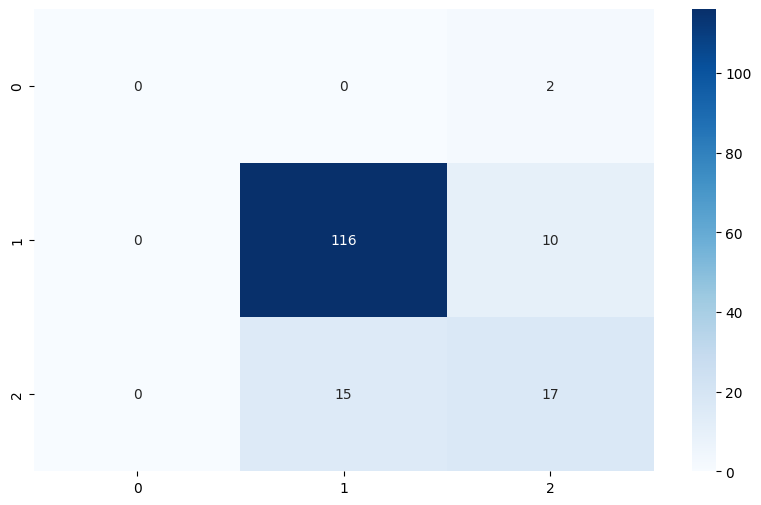

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

In [14]:
data=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "AgeGroup":label.fit_transform(["Teen"]),   
    "ProductQuality":label.fit_transform(["Excellent"]),
    "DeliverySpeed":label.fit_transform(["Slow"]),
    "PriceSatisfaction":label.fit_transform(["High"]),
    "SupportRating":[6],
    "ComplaintFiled":label.fit_transform(["No"])
})
pre=model.predict(data)
pre


array([2])